#**Starting with importing our needed Libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#**Phase 1 : EDA and Data quality report**

In [41]:
df = pd.read_csv("/content/hotel_bookings - hotel_bookings.csv")

##**Read the first and the last 5 raws from each feature**

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


##**describe the columns in our dataset statstical values and writing notes**

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


NOTES:
General Info

Rows (count): 95,789 records.

Target variable: is_canceled (binary: 0 = not canceled, 1 = canceled).

Many features describe booking details, customer history, and hotel stay characteristics.

Target Variable: is_canceled

Mean ≈ 0.46 → ~46% of bookings are canceled.

Balanced dataset (almost half canceled, half not).

Booking & Date Features

lead_time (days before arrival the booking was made):

Avg ≈ 106 days.

Range: 0 → 737 days (some bookings made 2 years in advance).

Arrival dates:

Years: 2015–2017.

Week number: 1–53, fairly spread (mean ~27).

Day of month: 1–31, evenly distributed.

Stay Details

stays_in_weekend_nights:

Avg ≈ 0.95 nights (often 0–2).

Max = 19 (likely outliers).

stays_in_week_nights:

Avg ≈ 2.57 nights.

Max = 50 (outliers).

Typical stay: 2–4 nights, sometimes longer.

Guest Information

adults:

Mean ≈ 1.85.

Mostly 2 adults (50% quantile = 2).

Max = 55 (outlier).

children:

Mean ≈ 0.10, most bookings have none.

Max = 10 (outliers).

babies:

Mean ≈ 0.008 → almost always 0.

Max = 10 (rare).

Customer History

is_repeated_guest:

~3.6% repeated customers.

previous_cancellations:

Most = 0.

Max = 26 (some guests cancel often).

previous_bookings_not_canceled:

Usually 0.

Max = 72 (very loyal guests).

Booking Changes & Agents

booking_changes:

Median = 0, most don’t change.

Max = 21 changes.

agent:

Many missing (only ~81k filled).

Wide range of values (IDs up to 535).

company:

Sparsely filled (only ~5.7k entries).

Financial & Requests

days_in_waiting_list:

Mostly 0.

Max = 391 days (over a year).

adr (Average Daily Rate):

Mean ≈ 98.65.

Range: -6.38 → 5400 (negative/very high → likely errors or outliers).

required_car_parking_spaces:

Almost always 0.

Max = 8.

total_of_special_requests:

Mean ≈ 0.50.

Max = 5.

Data Quality / Observations

Outliers in adr, adults, stays_in_*_nights, and guests (children/babies).

Some missing values in agent and company.

Dataset is relatively balanced on cancellations.

Majority of bookings are 2 adults, short stays (2–4 nights), no kids, no special requests

##**Read our dataframe also info**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From this we conclude that there are number of 12 features that are object we need to deal with using encoding and other 13 of dtype int64 and other 7 of data type float64 and there are columns that will be dropped cause of the high percentage of the nulls in it and other will be replaced with mode and some with median or mean depending on their distrubtation

##**Viualizing and trying to catch the number of nulls in each column**

In [46]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


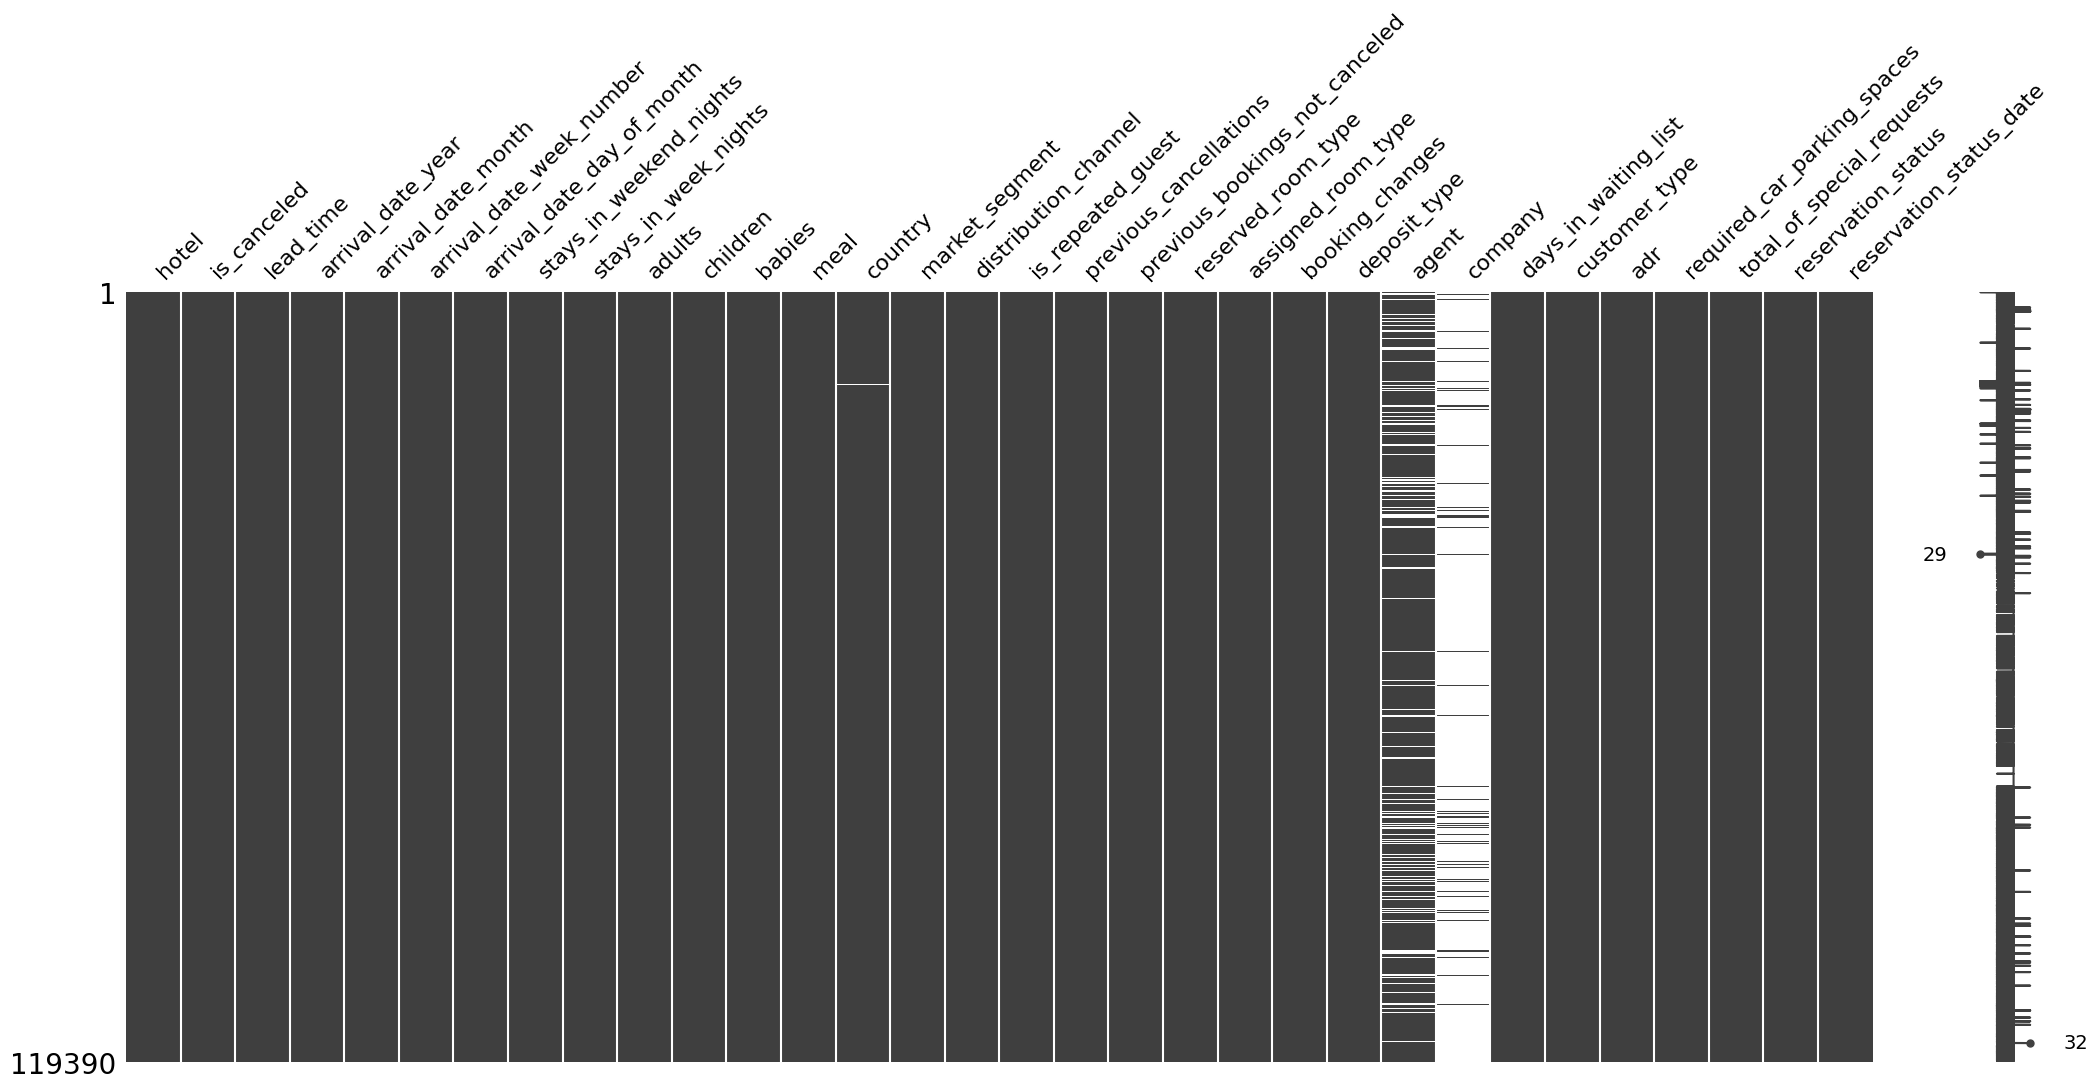

In [47]:
import missingno as msno

msno.matrix(df)
plt.show()

Notes:
Columns with no nulls

hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, babies, meal, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type
➡️ No action needed.

🔹 Columns with very few nulls (1–4 rows, negligible)

children (4 nulls) → Fill with 0 (most common value, aligns with majority having no children).

days_in_waiting_list (1 null) → Fill with 0 (default, most are 0).

customer_type (1 null) → Fill with mode (most common type, e.g., "Transient").

adr (1 null) → Fill with median (robust against outliers).

required_car_parking_spaces (1 null) → Fill with 0 (most guests don’t request parking).

total_of_special_requests (1 null) → Fill with 0 (majority have no requests).

reservation_status (1 null) → Fill with mode (most frequent status).

reservation_status_date (1 null) → If reservation_status is imputed, fill with a reasonable placeholder (e.g., forward-fill from nearby records or drop this row if unsure).

🔹 Columns with moderate missingness

country (487 nulls ≈ 0.5%) → Fill with mode (most frequent country, usually "PRT"). If geographic analysis is important, create a category "Unknown".

🔹 Columns with large missingness

agent (14,037 nulls ≈ 15%) →

If important for analysis: Fill with special category (e.g., 0 or “Unknown”).

Otherwise: Can be dropped if not useful for your model.

company (90,063 nulls ≈ 94%) →

Too sparse → Best to drop this column (not informative).

Alternative: Encode missing as "No company" if you want to keep it.

##**Detecting outliers for our data and visualize them using box plot**

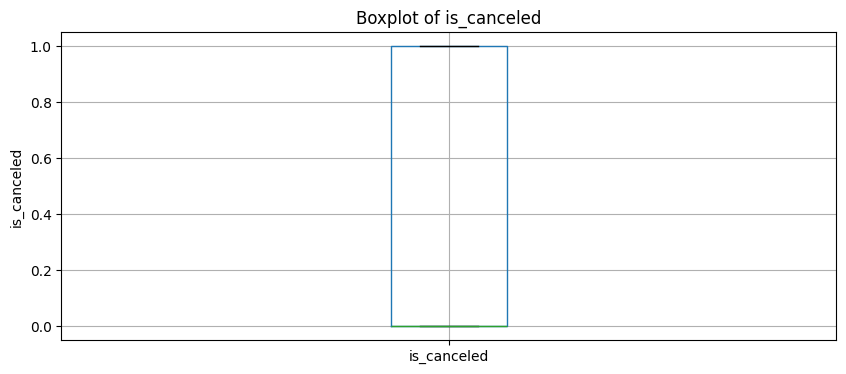

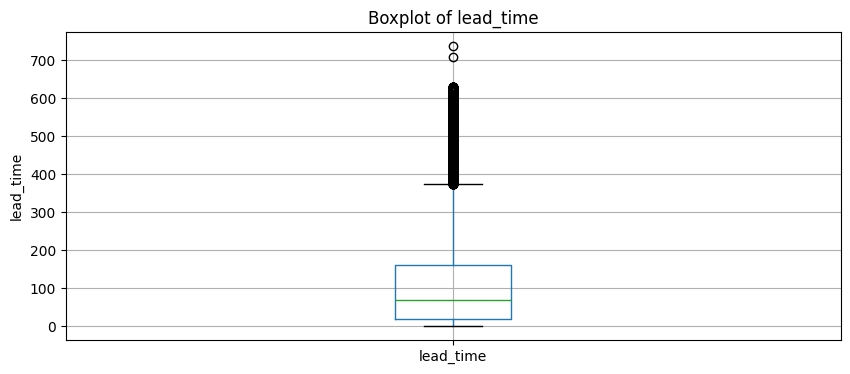

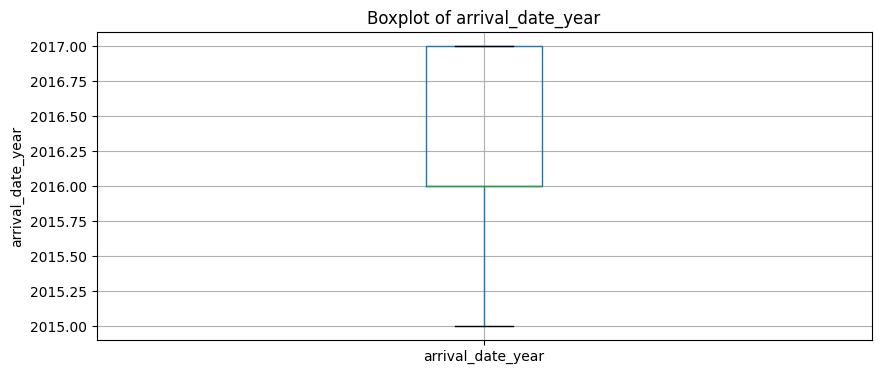

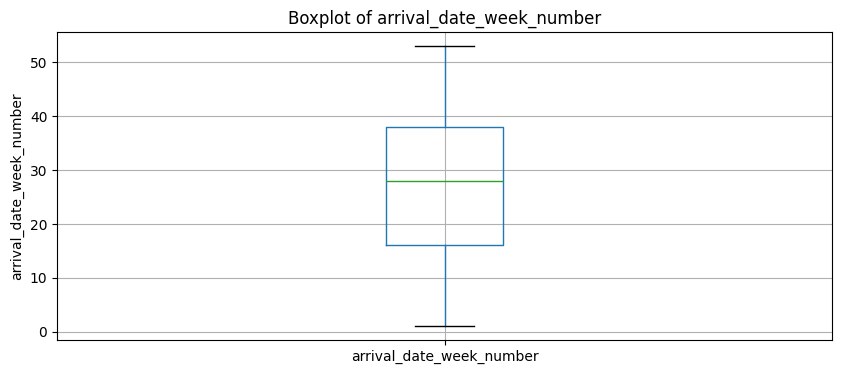

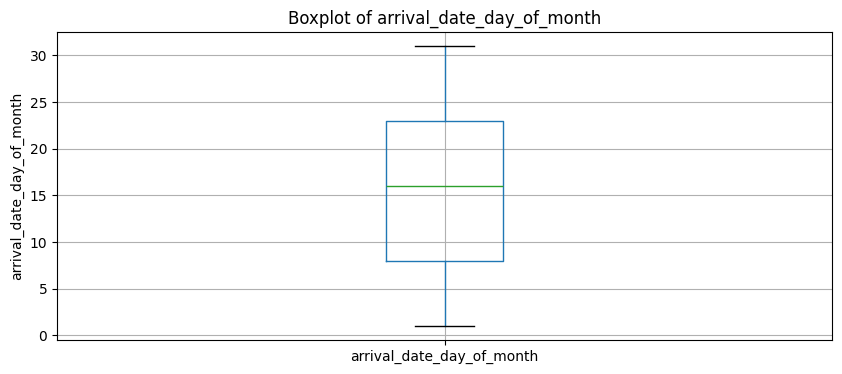

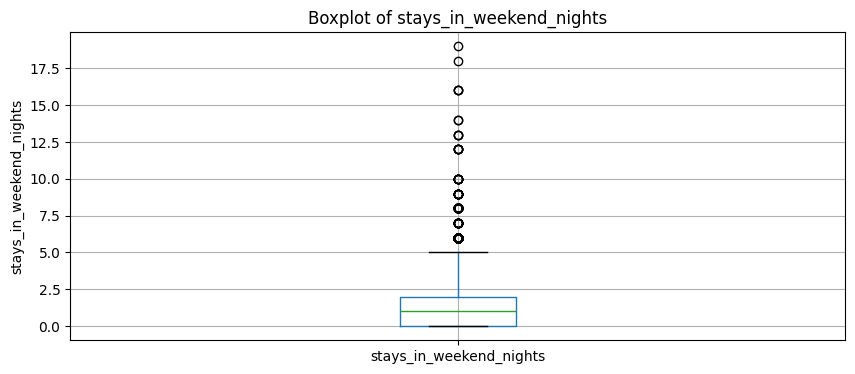

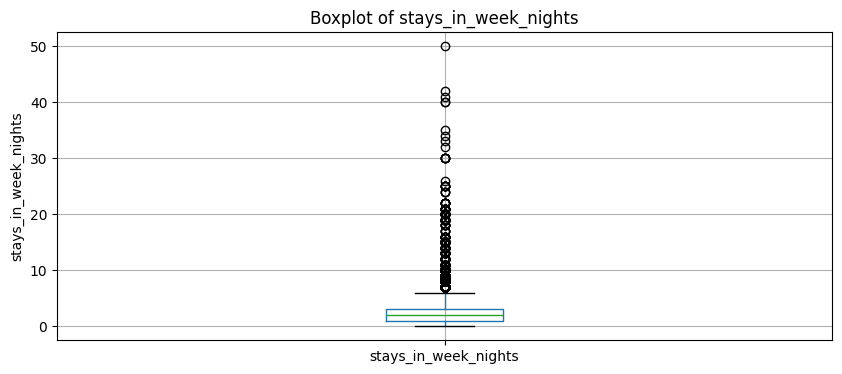

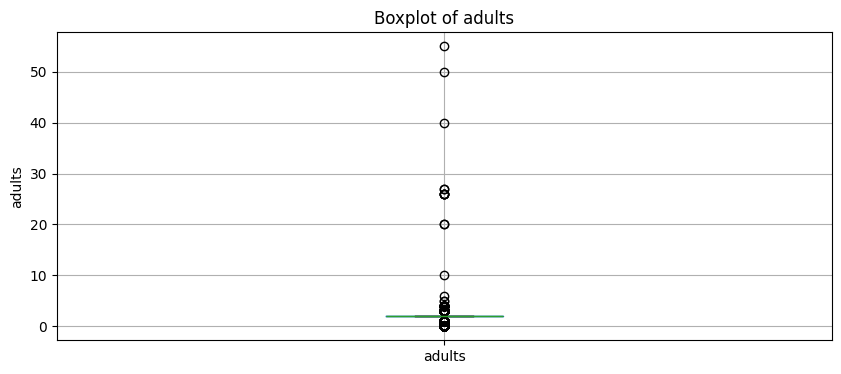

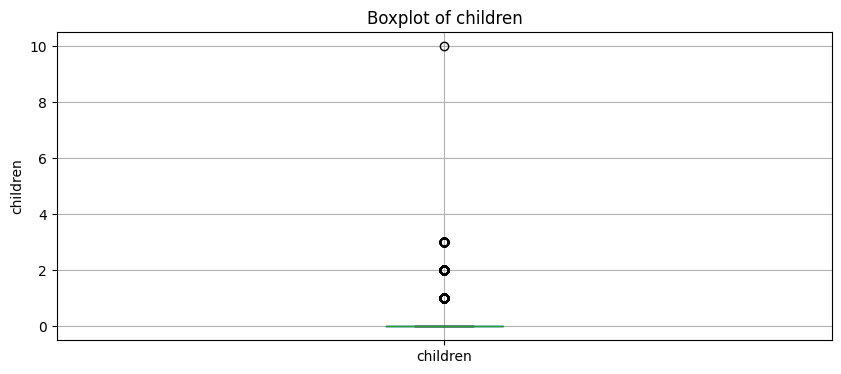

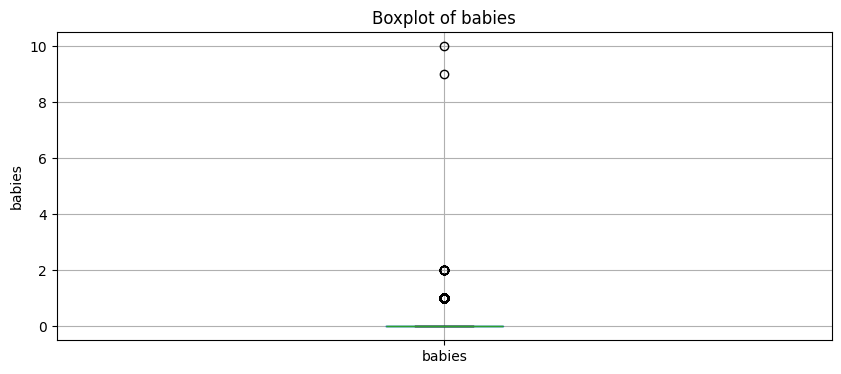

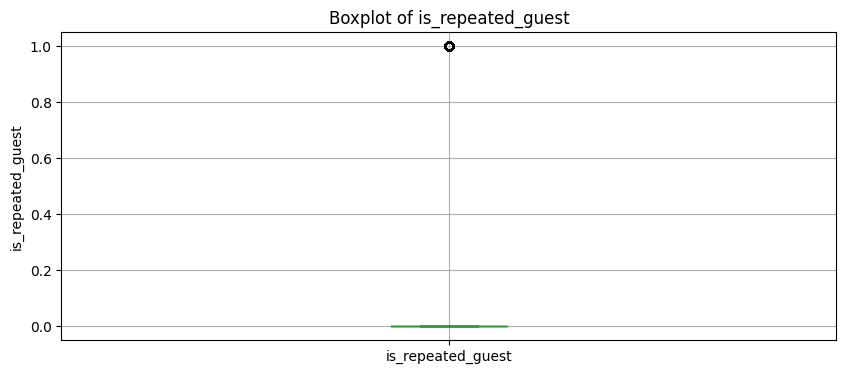

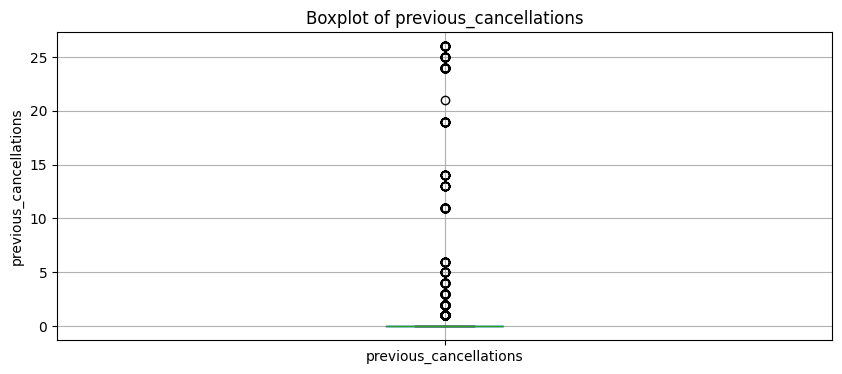

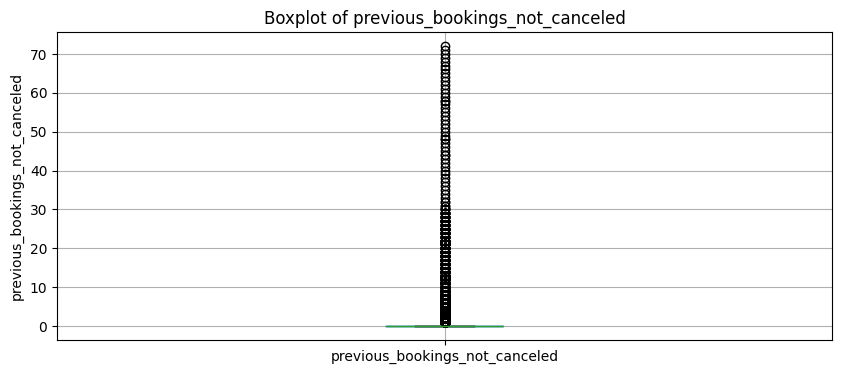

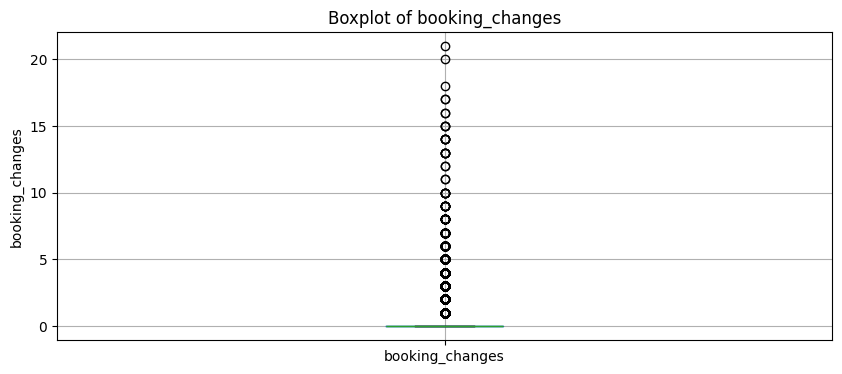

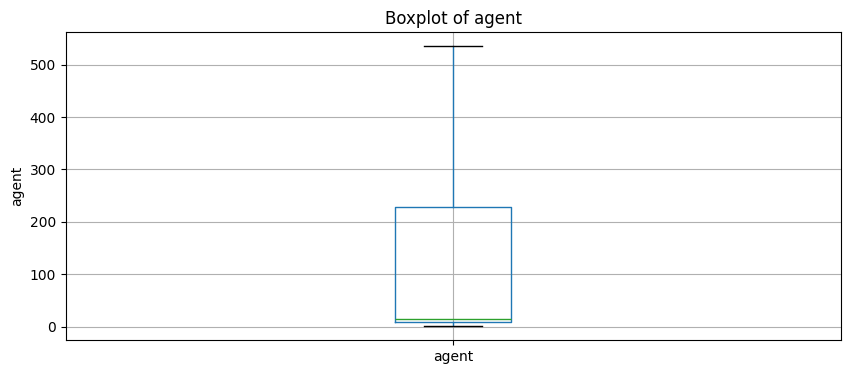

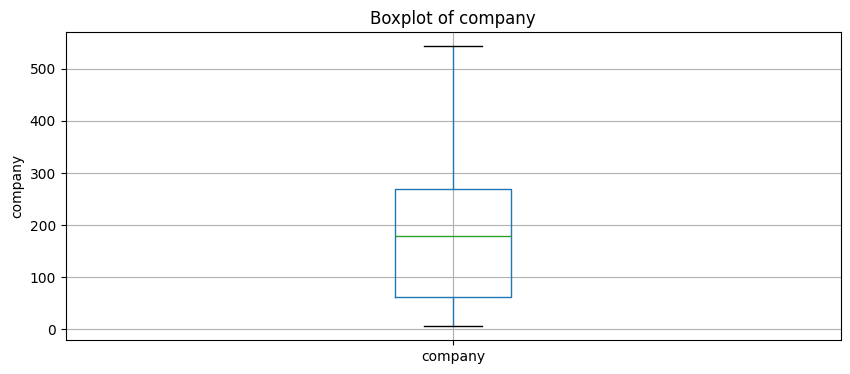

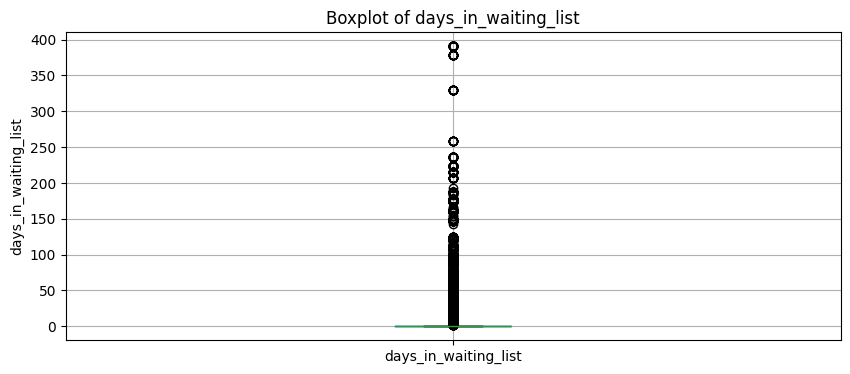

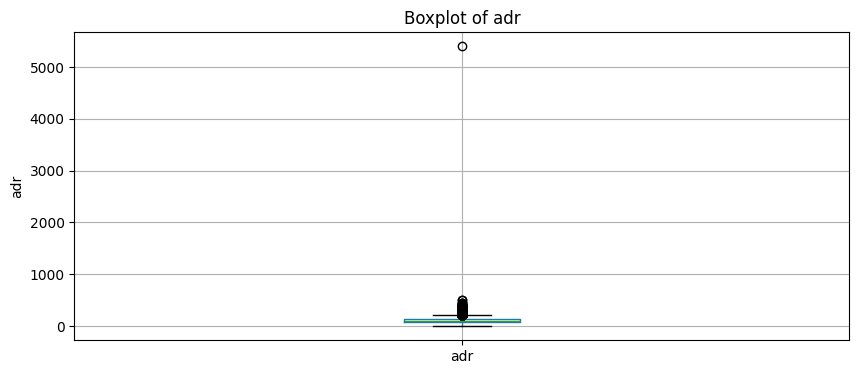

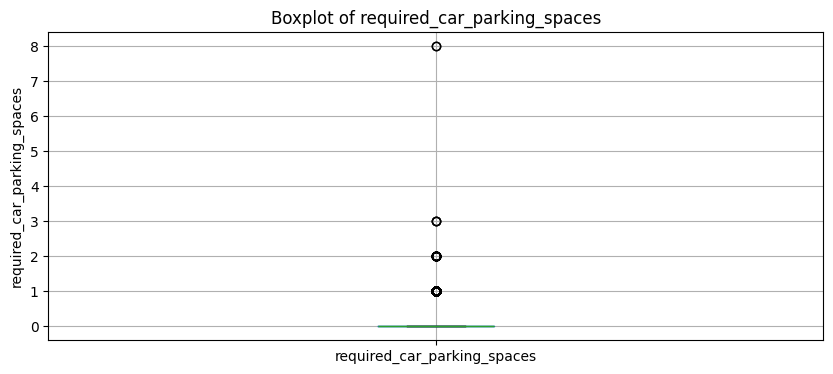

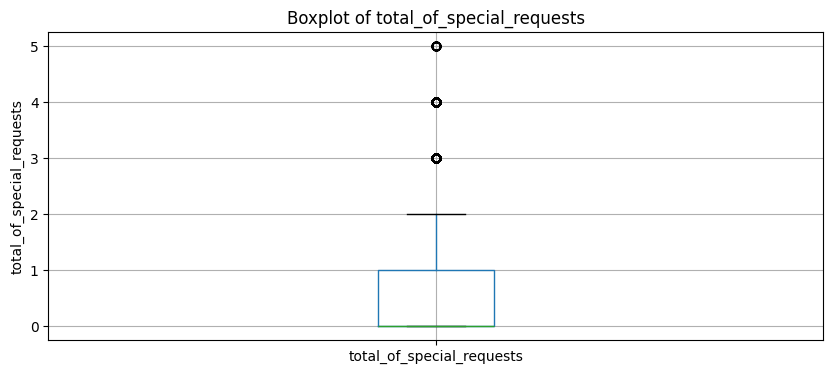

In [48]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

NOTES on Outliers from Boxplots:

*   **lead_time:** Has a significant number of outliers on the higher end, indicating some bookings were made very far in advance.
*   **stays_in_weekend_nights:** Shows outliers on the higher end, with some guests staying for an unusually large number of weekend nights.
*   **stays_in_week_nights:** Similar to weekend nights, there are many outliers on the higher end, suggesting some guests have very long weekday stays.
*   **adults, children, babies:** These columns have outliers on the higher end, indicating some bookings are for a very large number of adults, children, or babies, which might be data entry errors or group bookings.
*   **previous_cancellations:** Shows outliers on the higher end, suggesting a few guests have a history of many cancellations.
*   **previous_bookings_not_canceled:** Has outliers on the higher end, indicating some guests have a very large number of previous successful bookings.
*   **booking_changes:** Shows outliers on the higher end, indicating some bookings have undergone an unusually high number of changes.
*   **agent:** Has outliers on the higher end, likely representing a few agents with a very large number of bookings.
*   **company:** Shows a large number of outliers, which is expected given the high percentage of missing values and the nature of company IDs.
*   **days_in_waiting_list:** Has outliers on the higher end, indicating some bookings were on a waiting list for a very long time.
*   **adr (Average Daily Rate):** Shows significant outliers on both the lower and higher ends. The negative values and extremely high values are likely data errors.
*   **required_car_parking_spaces:** Has outliers on the higher end, indicating a few bookings requested an unusually high number of parking spaces.
*   **total_of_special_requests:** Shows outliers on the higher end, indicating some bookings have a high number of special requests.

Columns that show relatively fewer or no significant outliers are:
*   **is_canceled** (binary variable)
*   **arrival_date_year**
*   **arrival_date_week_number**
*   **arrival_date_day_of_month**
*   **is_repeated_guest** (binary variable)

##**Final Notes**

The dataset is generally clean and large, but suffers from missing values in agent/company, outliers in ADR and guest counts, and skewed distributions in several categorical/behavioral features. These issues need to be addressed before building predictive models.

#**Phase 2: Data cleaning(the core of the project)**

##**Starting with handling the null values**

###**For company and agent replace with 0**

In [49]:
df[['company', 'agent']] = df[['company', 'agent']].fillna(0)

###**For Country replace with mode values**

In [50]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

###**For Children replace with median cause of the skewness in the data**

In [51]:
df['children'] = df['children'].fillna(df['children'].median())

##**Handle the dupilcate raws in our data**

In [52]:
df.duplicated().sum()

np.int64(32013)

In [53]:
df.drop_duplicates(inplace=True)

##**Handling the outliers in our data Using IQR METHOD with higher and lower bound replacment**

In [54]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, np.where(df[col] > upper_bound, upper_bound, df[col]))

print("Outliers handled for numerical columns using IQR replacement.")

Outliers handled for numerical columns using IQR replacement.


##**Handle the wrong datatypes features**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87377 non-null  object 
 1   is_canceled                     87377 non-null  float64
 2   lead_time                       87377 non-null  float64
 3   arrival_date_year               87377 non-null  float64
 4   arrival_date_month              87377 non-null  object 
 5   arrival_date_week_number        87377 non-null  float64
 6   arrival_date_day_of_month       87377 non-null  float64
 7   stays_in_weekend_nights         87377 non-null  float64
 8   stays_in_week_nights            87377 non-null  float64
 9   adults                          87377 non-null  float64
 10  children                        87377 non-null  float64
 11  babies                          87377 non-null  float64
 12  meal                            8737

###**handle arrival date month column to be a datatime column**

In [56]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

###**Handle the reservation status date to be numerical**

In [57]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#**Phase 3: Feature engneering and preprocessing part**

##**Creating new features for our data**

In [58]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [59]:
df['is_family'] = np.where((df['adults'] > 0) & (df['children'] > 0), 1, 0)

In [60]:
df['total_revenue'] = df['adr'] * df['total_nights'] * df['total_guests']

In [61]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_date_month'].map(get_season)

In [62]:
df['guest_type'] = df['total_guests'].apply(lambda x: 'Single' if x==1
                                            else 'Couple' if x==2
                                            else 'Group')

##**Remove data leackage columns**

In [63]:
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

##**Encode the categorical data**

###**Calc the cardinality ratio for each column to choose the situable encoding type for your features**

In [64]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    ratio = df[col].nunique() / len(df)
    print(f"{col}: {df[col].nunique()} unique ({ratio:.2%} of dataset)")

hotel: 2 unique (0.00% of dataset)
meal: 5 unique (0.01% of dataset)
country: 177 unique (0.20% of dataset)
market_segment: 8 unique (0.01% of dataset)
distribution_channel: 5 unique (0.01% of dataset)
reserved_room_type: 10 unique (0.01% of dataset)
assigned_room_type: 12 unique (0.01% of dataset)
deposit_type: 3 unique (0.00% of dataset)
customer_type: 4 unique (0.00% of dataset)
season: 4 unique (0.00% of dataset)
guest_type: 1 unique (0.00% of dataset)


###**Make a function for replacing high cardinality values > 8 unique with frequency encoding and low cardinality values < 8 with one hot encoding technique**

In [65]:
def encode_categoricals(df):
    df = df.copy()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        unique_count = df[col].nunique()
        if unique_count <= 8:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
            df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
        else:
            freq_map = df[col].value_counts().to_dict()
            df[col] = df[col].map(freq_map)

    return df


In [66]:
df = encode_categoricals(df)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87377 non-null  float64
 1   lead_time                       87377 non-null  float64
 2   arrival_date_year               87377 non-null  float64
 3   arrival_date_month              87377 non-null  int32  
 4   arrival_date_week_number        87377 non-null  float64
 5   arrival_date_day_of_month       87377 non-null  float64
 6   stays_in_weekend_nights         87377 non-null  float64
 7   stays_in_week_nights            87377 non-null  float64
 8   adults                          87377 non-null  float64
 9   children                        87377 non-null  float64
 10  babies                          87377 non-null  float64
 11  country                         87377 non-null  int64  
 12  is_repeated_guest               8737

##**Data Train and test split for model train and eval**

In [70]:
x = df.drop('is_canceled', axis=1)
y = df['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)